# Introduction

<p style="text-align: justify;"><span style="font-family: times new roman,times; font-size: large;">Lebanon is one of the most culturally diverse countries in the Middle East having over 300 breathtaking touristic sites just within a 10452 km^2 area. Today, Lebanon is facing a very challenging economic crisis, and obviously there is no better way to aid this crisis than by investing in tourism, what was once one of the main sources of income in the country. Whether it is museums, old towns, castles, night-clubs, restaurants or even ecotourism, a tourist can only wonder where to begin in order to enjoy the Lebanese experience to the fullest during his short stay.&nbsp;</span></p>

<p style="text-align: justify;"><span style="font-family: times new roman,times; font-size: large;">Roads in Lebanon are poorly maintained to the extent where traffic is part of the population's daily lives. So a tourist that is unfamiliar with the country could waste a lot of time just to find a place to drink a simple cup of coffee. Nevertheless, the tourist can use some guidance based on their preferences and can be the judge of where to start or stop if a map that states what every town in the country is famous for was provided to them and therefore save time to explore even more places which would be an enjoyable experience for the tourist and a profitable one for Lebanon.</span></p>
<p style="text-align: justify;"><span style="font-family: times new roman,times; font-size: large;">Our project aims to give tourists a better idea about Lebanon and where to go for specific preferences using Data science and machine learning tools by clustering areas based on what are the most common venues. This way a tourist can immediately know where to go for a drink, or for a hike based on his current location.&nbsp;</span><span><br /></span></p>

# Data Description

In [101]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from sklearn.cluster import KMeans
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [102]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_5ecf59f1a4ca41f3852d76025a5820c9 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='sF-Y9y34U84BjRYOKk49jrI2XSfZS-7mYQjnpHbR67sh',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_5ecf59f1a4ca41f3852d76025a5820c9.get_object(Bucket='finalproject-donotdelete-pr-puumf9xaojuxxk',Key='Lebanon_municipality_dataset - Copy.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

,Municipality_ID,Municipality Name_EN,UNION_ID,Union_Full,UOM_Name,Pcode,Location_Name_En,Latitude,Longitude,Governorate,UN_AreaOfOperation,District,CAS_CODE,CAD_CODE,CAS_NAME,Cadastral_Type,Google_Map_link,Google_Map,UNHCR_Location
0,M1,Beirut,NaN,NaN,NaN,LBN11081,Marfaa,33.89890,35.51240,Beirut,Beirut & Mount Lebanon,Beirut,10450,10004,Marfaa,CF,"http://maps.google.com/maps?q=33.8989,35.5124",View on google maps,LEB0010280010037
1,M2,Jbail,261.0,Union of Municipalities Caza Jbeil,UOM Caza Jbeil,LBN34120,Jbail,34.12042,35.64711,Mount Lebanon,Beirut & Mount Lebanon,Jbeil,26111,26020,Jbayl,CF,"http://maps.google.com/maps?q=34.12042,35.64711",View on google maps,LEB0030130010663
2,M3,Edde,NaN,NaN,NaN,LBN34065,Edde,34.13981,35.66345,Mount Lebanon,Beirut & Mount Lebanon,Jbeil,26135,26046,Eddeh Jbayl,CF,"http://maps.google.com/maps?q=34.13981,35.66345",View on google maps,LEB0030130010594
3,M4,Ehmej,261.0,Union of Municipalities Caza Jbeil,UOM Caza Jbeil,LBN34066,Ehmej,34.12178,35.78399,Mount Lebanon,Beirut & Mount Lebanon,Jbeil,26211,26030,Ehmej,CF,"http://maps.google.com/maps?q=34.12178,35.78399",View on google maps,LEB0030130010596
4,M5,Bejje,NaN,NaN,NaN,LBN34035,Bejje,34.18018,35.71356,Mount Lebanon,Beirut & Mount Lebanon,Jbeil,26276,26068,Bejjeh,CF,"http://maps.google.com/maps?q=34.18018,35.71356",View on google maps,LEB0030130010492


In [103]:
df=df[['Municipality Name_EN', 'Latitude', 'Longitude', 'Governorate', 'District']]
df.head()

,Municipality Name_EN,Latitude,Longitude,Governorate,District
0,Beirut,33.89890,35.51240,Beirut,Beirut
1,Jbail,34.12042,35.64711,Mount Lebanon,Jbeil
2,Edde,34.13981,35.66345,Mount Lebanon,Jbeil
3,Ehmej,34.12178,35.78399,Mount Lebanon,Jbeil
4,Bejje,34.18018,35.71356,Mount Lebanon,Jbeil


In [104]:
df.shape

(1005, 5)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
Governorates= df['Governorate'].value_counts()
Governorates=pd.DataFrame(Governorates)
Governorates.rename(columns={'Governorate': 'Municipalities'}, inplace=True)
Governorates.head()

,Municipalities
Mount Lebanon,318
South,145
North,140
Akkar,121
El Nabatieh,118


In [7]:
gov_array=Governorates.index

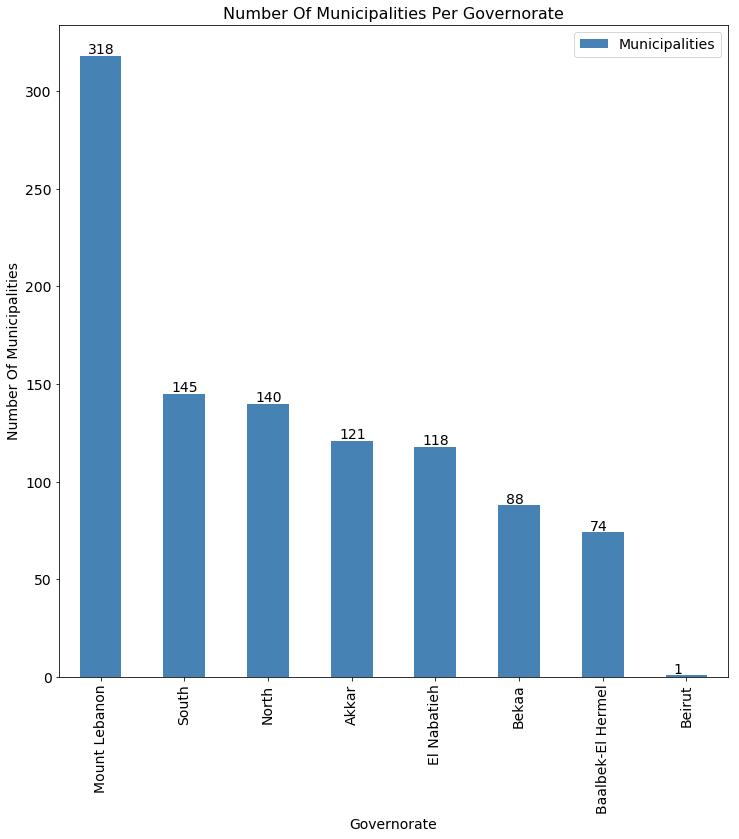

In [106]:
Governorates.plot(kind='bar', figsize=(12, 12), color='steelblue')
plt.xlabel('Governorate')
plt.ylabel('Number Of Municipalities')
plt.title('Number Of Municipalities Per Governorate')

i=-1
for index in gov_array:
    i=i+1
    value=Governorates.loc[index,'Municipalities']
    label = str(value)
    plt.annotate(label, xy=(i-0.15, value+1), color='black')
            
plt.rc('font', size=14)
plt.rc('axes', titlesize=16)

In [107]:
Districts= df['District'].value_counts()
Districts=pd.DataFrame(Districts)
Districts.rename(columns={'District':'Municipalities'}, inplace=True)
Districts.head()

,Municipalities
Akkar,121
Chouf,74
Baalbek,66
Sour,61
Aley,57


In [108]:
dist_array=Districts.index

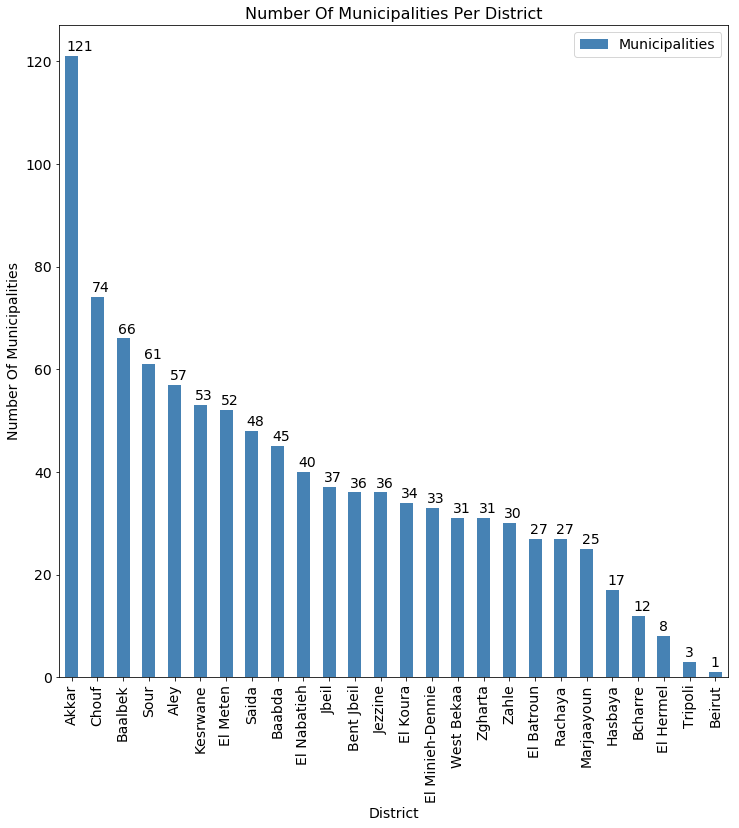

In [109]:
Districts.plot(kind='bar', figsize=(12, 12), color='steelblue')
plt.xlabel('District')
plt.ylabel('Number Of Municipalities')
plt.title('Number Of Municipalities Per District')

i=-1
for index in dist_array:
    i=i+1
    value=Districts.loc[index,'Municipalities']
    label = str(value)
    plt.annotate(label, xy=(i-0.2, value+1), color='black')
            
plt.rc('font', size=14)
plt.rc('axes', titlesize=16)

In [110]:
map_Lebanon = folium.Map(location=[33.8547, 35.8623], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['District'], df['Municipality Name_EN']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Lebanon)  
    
map_Lebanon

In [111]:
CLIENT_ID = 'GEPHWN4NK0EAZ3KT32D41EPV5Z20AQUGMK4U5OXIDU3NIN2Z' # your Foursquare ID
CLIENT_SECRET = '2SV4EQBGTSJ0LZYDI3OK0LE15ISZ31UXZXPP2TVMP2VQKQD1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GEPHWN4NK0EAZ3KT32D41EPV5Z20AQUGMK4U5OXIDU3NIN2Z
CLIENT_SECRET:2SV4EQBGTSJ0LZYDI3OK0LE15ISZ31UXZXPP2TVMP2VQKQD1


In [112]:
df_MLB = df[(df['Governorate'] == 'Mount Lebanon') | (df['Governorate']=='Beirut')].reset_index(drop=True)
df_MLB.head()

,Municipality Name_EN,Latitude,Longitude,Governorate,District
0,Beirut,33.89890,35.51240,Beirut,Beirut
1,Jbail,34.12042,35.64711,Mount Lebanon,Jbeil
2,Edde,34.13981,35.66345,Mount Lebanon,Jbeil
3,Ehmej,34.12178,35.78399,Mount Lebanon,Jbeil
4,Bejje,34.18018,35.71356,Mount Lebanon,Jbeil


In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            400)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
MLB_venues = getNearbyVenues(names=df_MLB['Municipality Name_EN'],
                                   latitudes=df_MLB['Latitude'],
                                   longitudes=df_MLB['Longitude']
                                  )

Beirut
Jbail
Edde
Ehmej
Bejje
Blat
Tartij
Jaj
Halat
Aaqoura
Aamchit
Aannaya - Kfarbaal  
Fatre
Fidar
Qartaba
Lassa
Ain el Ghouaibe
Laqlouq
Mghaira
Monsef
Maifouq - Qattara
Nahrh Ibrahim
Lehfed
Majdel
Yanouh - Hedayne
Mazraat Es Siyad
Ras Osta
Mechane
Hjoula
El Houssoun
Hosrayel
Barbara
Bechtelida - Fidar
Afqa
Almat Ej Jnoubiye - ech Chemaliye - Ain Souane
MechMech Jbeil
Ghabate - Rouaiss
Ghalboun
Jounieh
Balloune
Bouar
Jdaidet Ghazir
Jitta
Jouret Bedrane
Jouret Et Tormoss
Hrajel
Hsayn
Hayata
Darayia Kesrwane
Daraaoun - Harissa
Delbta
Zouk Mosbeh
Zouq Mkayel
Raashine
Raifoun
Shaile
Chnanaair
Safra kesrwane
Tabarja - Kfar Yassine
Aajaltoun
El Aazra et el Aazr
Aaramoun Kesrwane
Aachqout
El Aaqaybe Kesrouane
Ain Er Rihane
Aintoura
Ghbale
Ghazir
Ghosta
Ghine
Faraiya
Faitroun
Qlaiaat
Kfardibiane
Kfour
Mairouba
Yahchouch
Maaysra
Beqaatet Aachqout
Ouata Ej Jaouz
Zaaitra
Fatqa
Chahtoul - Jouret Mhad
Batha
Zeitoun
Ghadras
Bqaatouta
Kfar Tay
Bzoummar
Edma et Dafne
Jdaide - Baouchriye - Sad el Bao

In [113]:
MLB_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Beirut,33.8989,35.5124,Lux,33.898216,35.511064,Diner
1,Beirut,33.8989,35.5124,4:29,33.896833,35.509955,Pub
2,Beirut,33.8989,35.5124,La Mezcaleria,33.897481,35.511032,Mexican Restaurant
3,Beirut,33.8989,35.5124,Freddy's Hotdog,33.897188,35.511741,Hot Dog Joint
4,Beirut,33.8989,35.5124,Le Petit Gris,33.896019,35.510799,French Restaurant


In [122]:
MLB_Neighbors=MLB_venues.groupby('Neighborhood').count()

In [123]:
MLB_Neighbors.sort_values('Venue Category', ascending=False, inplace=True)
MLB_Neighbors=MLB_Neighbors['Venue']
MLB_Neighbors=pd.DataFrame(MLB_Neighbors)
MLB_Neighbors.tail()

,Venue
Neighborhood,
Damour,5
Hrajel,5
Dik El Mehdi - Deir Tamich,5
Ehmej,5
Kfar Him,5


In [124]:
MLB_Neighbors_Top20=MLB_Neighbors.head(20)

In [125]:
MLB_array=MLB_Neighbors_Top20.index

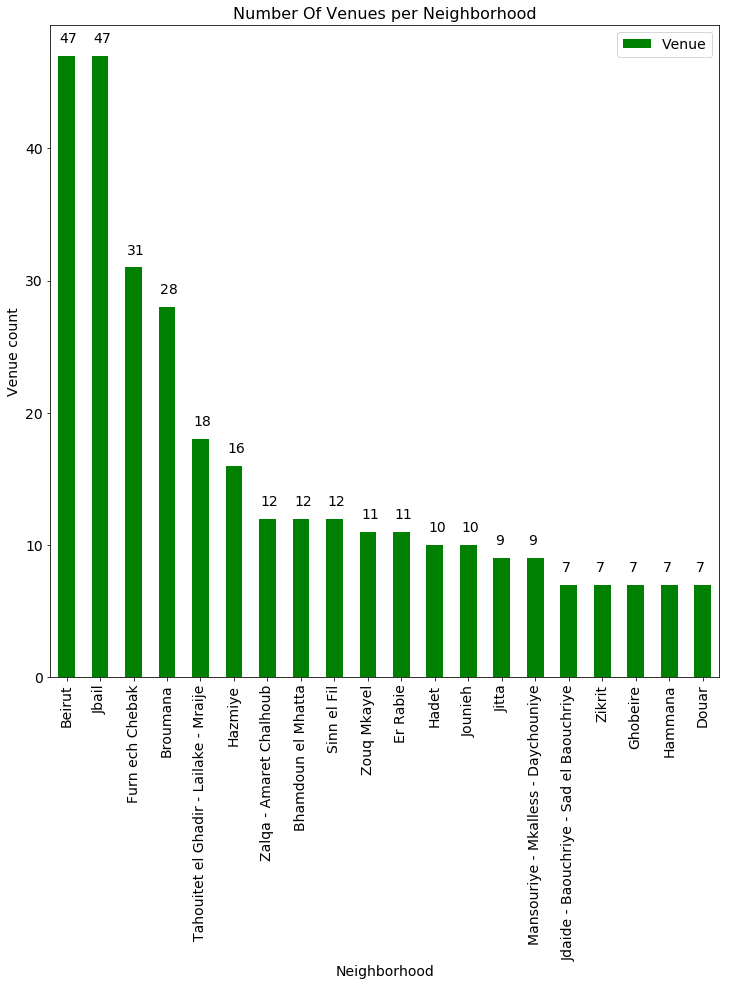

In [126]:
MLB_Neighbors_Top20.plot(kind='bar', figsize=(12, 12), color='green')
plt.xlabel('Neighborhood')
plt.ylabel('Venue count')
plt.title('Number Of Venues per Neighborhood')

i=-1
for index in MLB_array:
    i=i+1
    value=MLB_Neighbors_Top20.loc[index,'Venue']
    label = str(value)
    plt.annotate(label, xy=(i-0.2, value+1), color='black')
            
plt.rc('font', size=14)
plt.rc('axes', titlesize=16)

In [119]:
MLB_waste=MLB_Neighbors[MLB_Neighbors['Venue']<5]

In [120]:
MLB_waste.rename(columns={'Venue': 'Number of Venues'}, inplace=True)
MLB_waste.head()

,Number of Venues
Neighborhood,


In [25]:
MLB_waste.shape

(174, 1)

In [127]:
MLB_waste_array=MLB_waste.index

In [128]:
indices=[]
for i in MLB_waste_array:
    index=MLB_venues[MLB_venues['Neighborhood']== i].index.values
    for j in range(0,len(index)):
        value=index[j]
        indices.append(value)

In [129]:
MLB_venues.drop(indices, inplace=True)

In [130]:
MLB_venues.shape

(465, 7)

In [131]:
# one hot encoding
MLB_onehot = pd.get_dummies(MLB_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
MLB_onehot['Neighborhood'] =MLB_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [MLB_onehot.columns[-1]] + list(MLB_onehot.columns[:-1])
MLB_onehot = MLB_onehot[fixed_columns]

MLB_onehot.head()

,Zoo,Airport,Airport Lounge,Airport Service,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Basketball Court,Beach,Bistro,Bookstore,Border Crossing,Breakfast Spot,Brewery,Burger Joint,Café,Candy Store,Casino,Castle,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Diner,Dog Run,Donut Shop,Duty-free Shop,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food,Food & Drink Shop,Food Court,Food Service,French Restaurant,Garden,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Historic Site,Hostel,Hot Dog Joint,Hot Spring,Hotel,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Lebanese Restaurant,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Mountain,Multiplex,Music Venue,Neighborhood,New American Restaurant,Nightclub,Other Great Outdoors,Park,Pastry Shop,Pharmacy,Pizza Place,Plaza,Pool,Pub,Racetrack,Resort,Restaurant,Sandwich Place,Seafood Restaurant,Shoe Store,Shop & Service,Smoke Shop,Snack Place,Soccer Field,Spa,Sports Club,Stables,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Theater,Tourist Information Center,Tunnel,Video Store,Wine Bar,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Beirut,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Beirut,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Beirut,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Beirut,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Beirut,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [132]:
MLB_grouped = MLB_onehot.groupby('Neighborhood').mean().reset_index()
MLB_grouped.head()

,Neighborhood,Zoo,Airport,Airport Lounge,Airport Service,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Basketball Court,Beach,Bistro,Bookstore,Border Crossing,Breakfast Spot,Brewery,Burger Joint,Café,Candy Store,Casino,Castle,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cupcake Shop,Dance Studio,Department Store,Dessert Shop,Diner,Dog Run,Donut Shop,Duty-free Shop,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Food,Food & Drink Shop,Food Court,Food Service,French Restaurant,Garden,Gastropub,German Restaurant,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Historic Site,Hostel,Hot Dog Joint,Hot Spring,Hotel,Italian Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Lebanese Restaurant,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Mountain,Multiplex,Music Venue,New American Restaurant,Nightclub,Other Great Outdoors,Park,Pastry Shop,Pharmacy,Pizza Place,Plaza,Pool,Pub,Racetrack,Resort,Restaurant,Sandwich Place,Seafood Restaurant,Shoe Store,Shop & Service,Smoke Shop,Snack Place,Soccer Field,Spa,Sports Club,Stables,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Theater,Tourist Information Center,Tunnel,Video Store,Wine Bar,Women's Store
0,Antelias - Naqqach,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.166667,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.166667,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.166667,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1,Baaqline,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.333333,0.000000,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.166667,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.166667,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,Baissour,0.0,0.0,0.0,0.0,0.2,0.0,0.000000,0.0,0.2,0.0,0.2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.2,0.0,0.0,0.000000,0.0
3,Balloune,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.2,0.200000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.2,0.0,0.0,0.000000,0.0,0.0,0.0,

In [133]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [134]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = MLB_grouped['Neighborhood']

for ind in np.arange(MLB_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(MLB_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Antelias - Naqqach,Mediterranean Restaurant,Gym,Department Store,Bakery,Restaurant
1,Baaqline,Bakery,Pool,Burger Joint,Bookstore,Spa
2,Baissour,Gift Shop,Arts & Crafts Store,Tourist Information Center,American Restaurant,Athletics & Sports
3,Balloune,Gift Shop,Pharmacy,Sushi Restaurant,Pizza Place,Sandwich Place
4,Beirut,Pub,Bar,Cocktail Bar,Restaurant,Café


In [135]:
MLB_k= MLB_grouped.drop(['Neighborhood'], axis =1)
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(MLB_k)
    distortions.append(kmeanModel.inertia_)

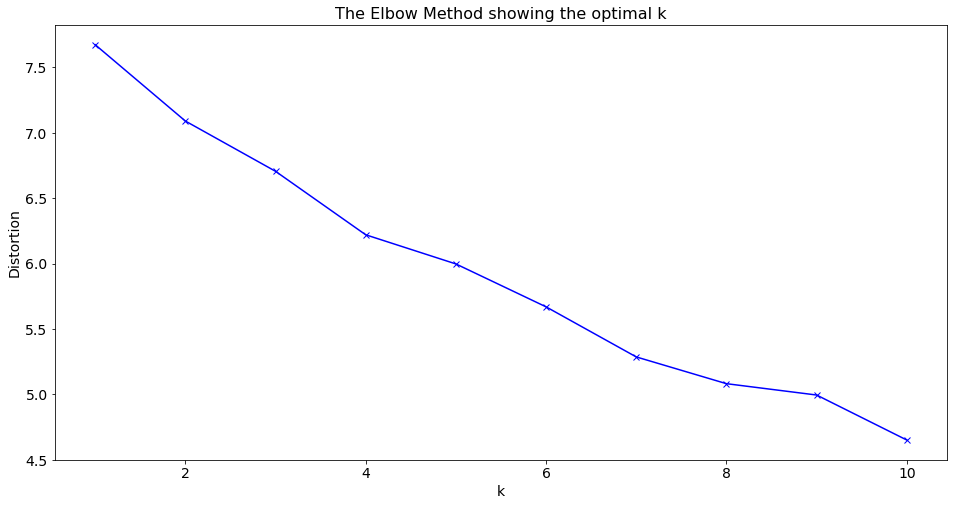

In [136]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [137]:
# set number of clusters
kclusters = 7


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(MLB_k)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 1, 6, 6, 6, 6, 4, 4, 6, 3], dtype=int32)

In [138]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

MLB_merged = df_MLB

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
MLB_merged = MLB_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Municipality Name_EN')

MLB_merged.head() # check the last columns!

,Municipality Name_EN,Latitude,Longitude,Governorate,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Beirut,33.89890,35.51240,Beirut,Beirut,6.0,Pub,Bar,Cocktail Bar,Restaurant,Café
1,Jbail,34.12042,35.64711,Mount Lebanon,Jbeil,6.0,Mediterranean Restaurant,Pub,French Restaurant,Seafood Restaurant,Bar
2,Edde,34.13981,35.66345,Mount Lebanon,Jbeil,NaN,NaN,NaN,NaN,NaN,NaN
3,Ehmej,34.12178,35.78399,Mount Lebanon,Jbeil,1.0,Mountain,Food Court,Plaza,Bakery,Women's Store
4,Bejje,34.18018,35.71356,Mount Lebanon,Jbeil,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
MLB_merged.dropna(inplace=True)

MLB_merged.reset_index(drop=True, inplace=True)

MLB_merged.head()

,Municipality Name_EN,Latitude,Longitude,Governorate,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Beirut,33.89890,35.51240,Beirut,Beirut,6.0,Pub,Bar,Cocktail Bar,Restaurant,Café
1,Jbail,34.12042,35.64711,Mount Lebanon,Jbeil,6.0,Mediterranean Restaurant,Pub,French Restaurant,Seafood Restaurant,Bar
2,Ehmej,34.12178,35.78399,Mount Lebanon,Jbeil,1.0,Mountain,Food Court,Plaza,Bakery,Women's Store
3,Jounieh,33.98231,35.63818,Mount Lebanon,Kesrwane,6.0,Pizza Place,Surf Spot,Racetrack,Bar,Bakery
4,Balloune,33.94877,35.67224,Mount Lebanon,Kesrwane,6.0,Gift Shop,Pharmacy,Sushi Restaurant,Pizza Place,Sandwich Place


In [150]:
MLB_merged['Cluster Labels']=MLB_merged['Cluster Labels'].astype("int")
MLB_merged.head()

,Municipality Name_EN,Latitude,Longitude,Governorate,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Beirut,33.89890,35.51240,Beirut,Beirut,6,Pub,Bar,Cocktail Bar,Restaurant,Café
1,Jbail,34.12042,35.64711,Mount Lebanon,Jbeil,6,Mediterranean Restaurant,Pub,French Restaurant,Seafood Restaurant,Bar
2,Ehmej,34.12178,35.78399,Mount Lebanon,Jbeil,1,Mountain,Food Court,Plaza,Bakery,Women's Store
3,Jounieh,33.98231,35.63818,Mount Lebanon,Kesrwane,6,Pizza Place,Surf Spot,Racetrack,Bar,Bakery
4,Balloune,33.94877,35.67224,Mount Lebanon,Kesrwane,6,Gift Shop,Pharmacy,Sushi Restaurant,Pizza Place,Sandwich Place


In [151]:
map_clusters = folium.Map(location=[33.8547, 35.8623],zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(MLB_merged['Latitude'], MLB_merged['Longitude'], MLB_merged['Municipality Name_EN'], MLB_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [243]:
cluster1=MLB_merged.loc[MLB_merged['Cluster Labels'] == 1, MLB_merged.columns[[1] + list(range(5, MLB_merged.shape[1]))]]
cluster2=MLB_merged.loc[MLB_merged['Cluster Labels'] == 2, MLB_merged.columns[[1] + list(range(5, MLB_merged.shape[1]))]]
cluster3=MLB_merged.loc[MLB_merged['Cluster Labels'] == 3, MLB_merged.columns[[1] + list(range(5, MLB_merged.shape[1]))]]
cluster4=MLB_merged.loc[MLB_merged['Cluster Labels'] == 4, MLB_merged.columns[[1] + list(range(5, MLB_merged.shape[1]))]]
cluster5=MLB_merged.loc[MLB_merged['Cluster Labels'] == 5, MLB_merged.columns[[1] + list(range(5, MLB_merged.shape[1]))]]
cluster6=MLB_merged.loc[MLB_merged['Cluster Labels'] == 6, MLB_merged.columns[[1] + list(range(5, MLB_merged.shape[1]))]]
cluster7=MLB_merged.loc[MLB_merged['Cluster Labels'] == 7, MLB_merged.columns[[1] + list(range(5, MLB_merged.shape[1]))]]

In [244]:
cluster1=cluster1.drop(['Latitude','Cluster Labels'], axis=1)
cluster1.head()

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,Mountain,Food Court,Plaza,Bakery,Women's Store
27,Fast Food Restaurant,Bakery,Burger Joint,Sandwich Place,Hotel
29,Diner,Video Store,Pharmacy,Convenience Store,Bakery
32,Bakery,Arts & Crafts Store,Coworking Space,Restaurant,Fast Food Restaurant
33,Bakery,Hotel,Food Court,Mountain,Cupcake Shop


In [245]:
c1=cluster1['1st Most Common Venue']
c2=cluster2['1st Most Common Venue']
c3=cluster3['1st Most Common Venue']
c4=cluster4['1st Most Common Venue']
c5=cluster5['1st Most Common Venue']
c6=cluster6['1st Most Common Venue']
c7=cluster7['1st Most Common Venue']

In [246]:
Clusters=pd.DataFrame()
Clusters['C1']=c1
Clusters.reset_index(drop=True, inplace=True)
c2.reset_index(drop=True, inplace=True)
Clusters['C2']=c2
c3.reset_index(drop=True, inplace=True)
Clusters['C3']=c3
c4.reset_index(drop=True, inplace=True)
Clusters['C4']=c4
c5.reset_index(drop=True, inplace=True)
Clusters['C5']=c5
c6.reset_index(drop=True, inplace=True)
Clusters['C6']=c6


Clusters.head()

,C1,C2,C3,C4,C5,C6
0,Mountain,Middle Eastern Restaurant,Seafood Restaurant,Mediterranean Restaurant,Market,Pub
1,Fast Food Restaurant,Middle Eastern Restaurant,Seafood Restaurant,Historic Site,Pastry Shop,Mediterranean Restaurant
2,Diner,Middle Eastern Restaurant,NaN,Dessert Shop,NaN,Pizza Place
3,Bakery,Pharmacy,NaN,Basketball Court,NaN,Gift Shop
4,Bakery,NaN,NaN,Mediterranean Restaurant,NaN,Concert Hall


In [247]:
clist=['C1','C2','C3','C4','C5','C6']
freq=pd.DataFrame()
for i in clist:
    f=Clusters[i].value_counts()
    freq=freq.append(f)
freq.replace(np.nan, 0, inplace=True)
freq=freq.astype('int')

In [248]:
freq.head()

,Bakery,Beach,Diner,Fast Food Restaurant,Mountain,Middle Eastern Restaurant,Pharmacy,Seafood Restaurant,Basketball Court,Coffee Shop,Dessert Shop,Historic Site,Mediterranean Restaurant,Restaurant,Market,Pastry Shop,Casino,Concert Hall,Gift Shop,Nightclub,Other Great Outdoors,Pizza Place,Pub
C1,3,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C2,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C3,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C4,0,0,0,0,0,1,0,0,1,1,1,1,2,1,0,0,0,0,0,0,0,0,0
C5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


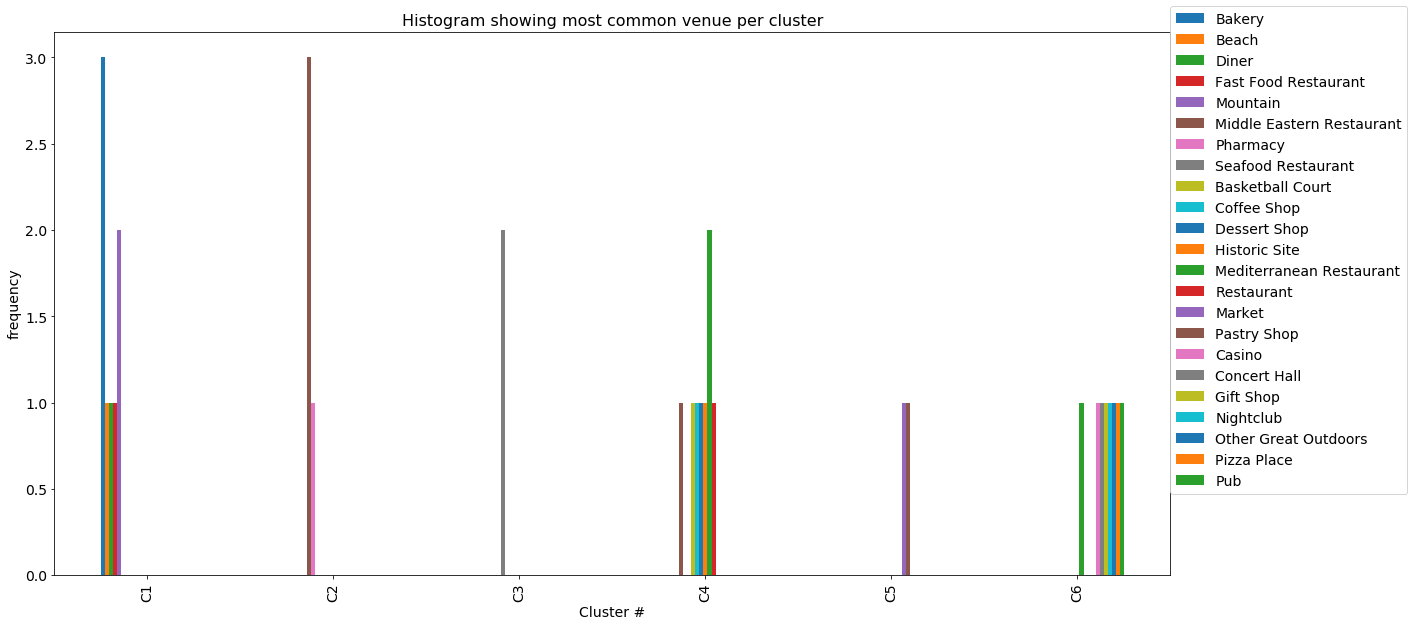

In [258]:
# generate histogram

freq.plot(kind='bar', figsize=(20,10))

plt.title('Histogram showing most common venue per cluster')
plt.ylabel('frequency')
plt.xlabel('Cluster #')
plt.legend(loc=(1,0.15))

plt.show()